# 10.2. Applying a linear filter to a digital signal

In [1]:
import numpy as np
import scipy as sp
import scipy.signal as sg
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nasdaq_df = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'nasdaq.csv?raw=true',
    index_col='Date',
    parse_dates=['Date'])

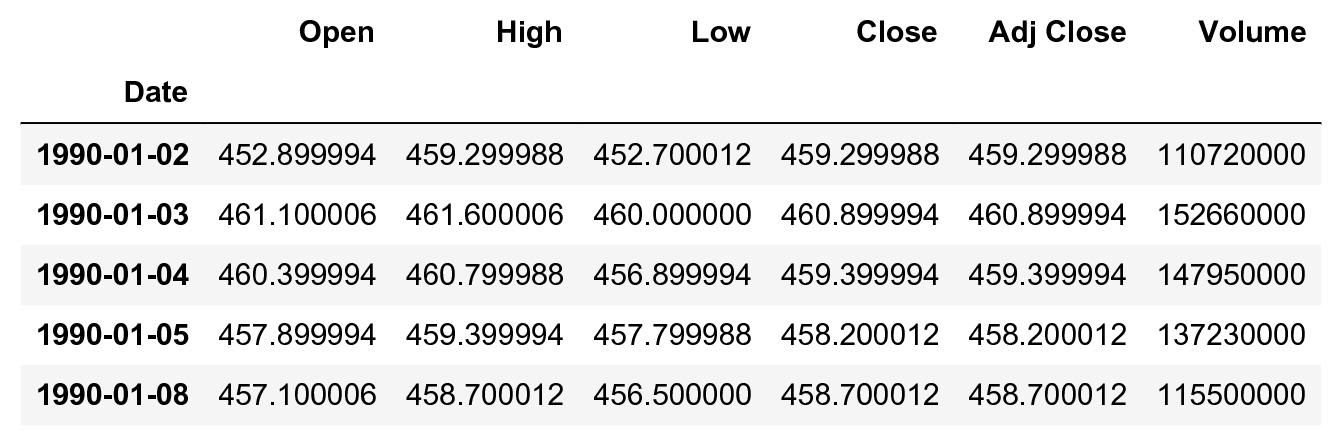

In [3]:
nasdaq_df.head()

In [4]:
date = nasdaq_df.index
nasdaq = nasdaq_df['Close']

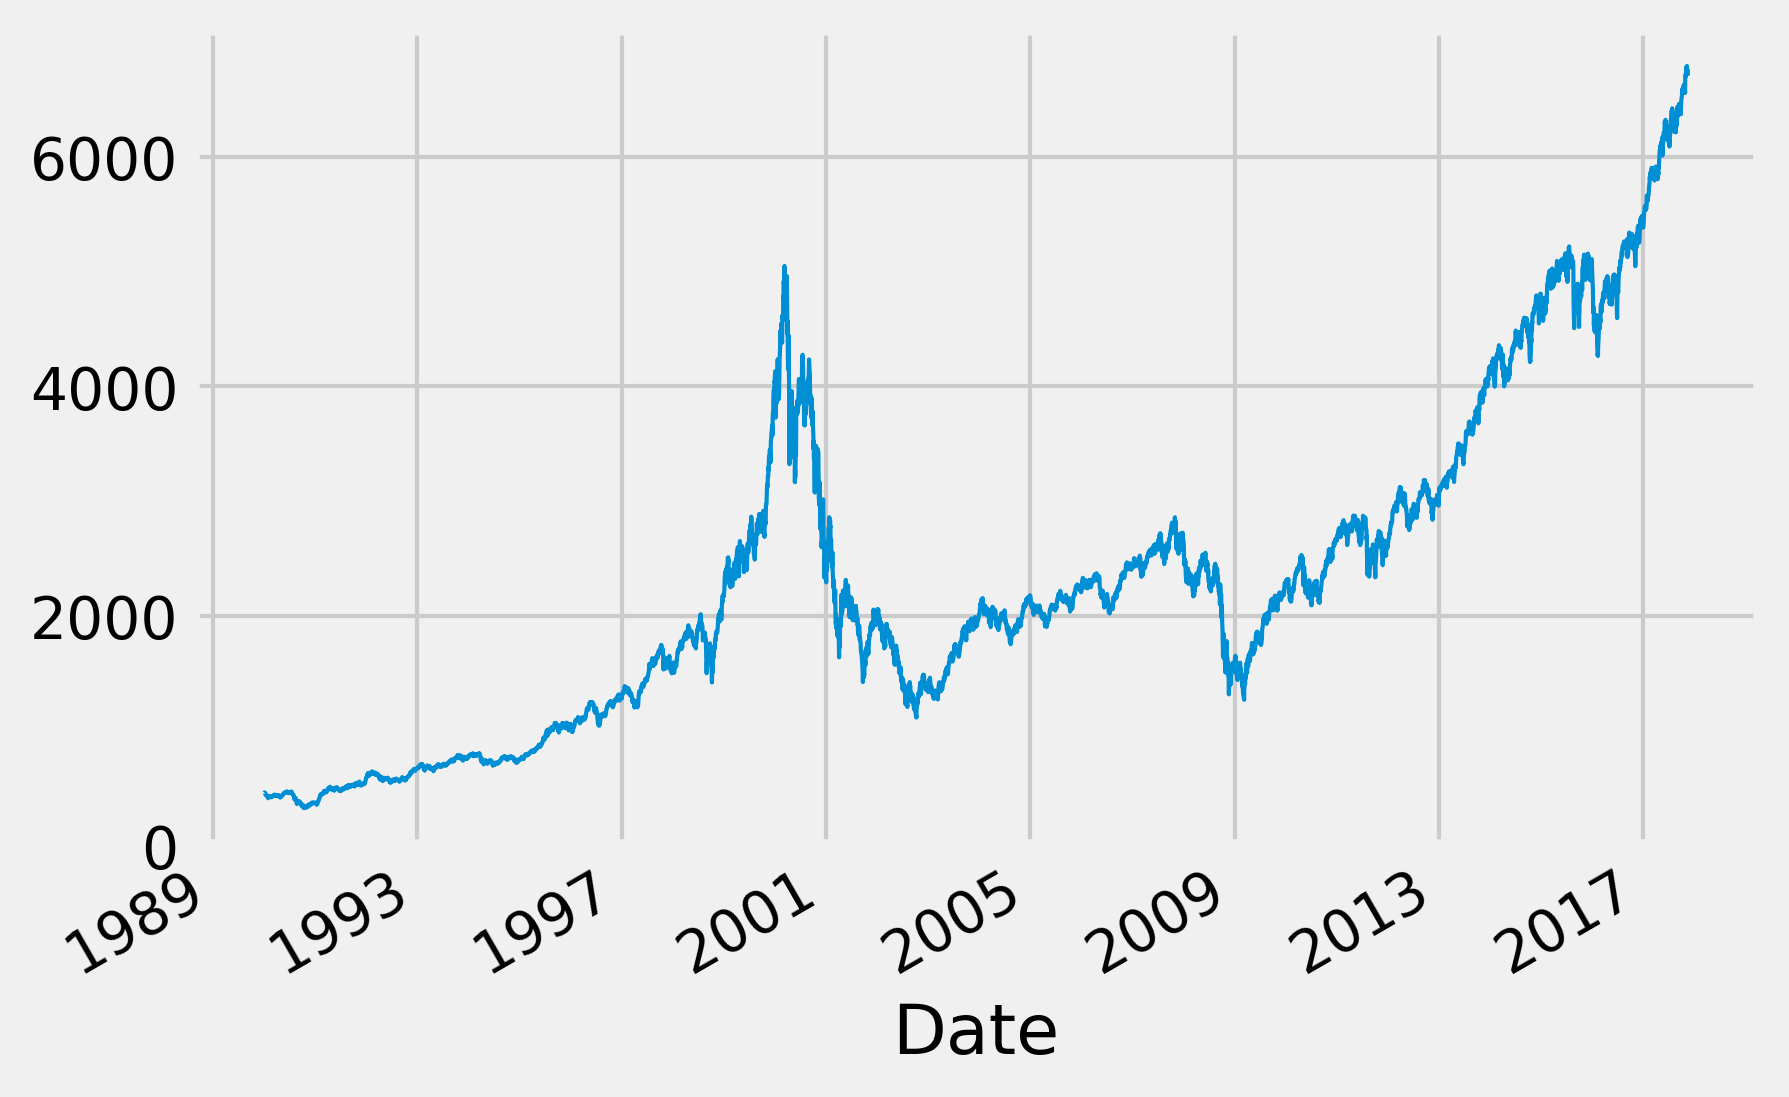

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
nasdaq.plot(ax=ax, lw=1)

In [6]:
# We get a triangular window with 60 samples.
h = sg.get_window('triang', 60)
# We convolve the signal with this window.
fil = sg.convolve(nasdaq, h / h.sum())

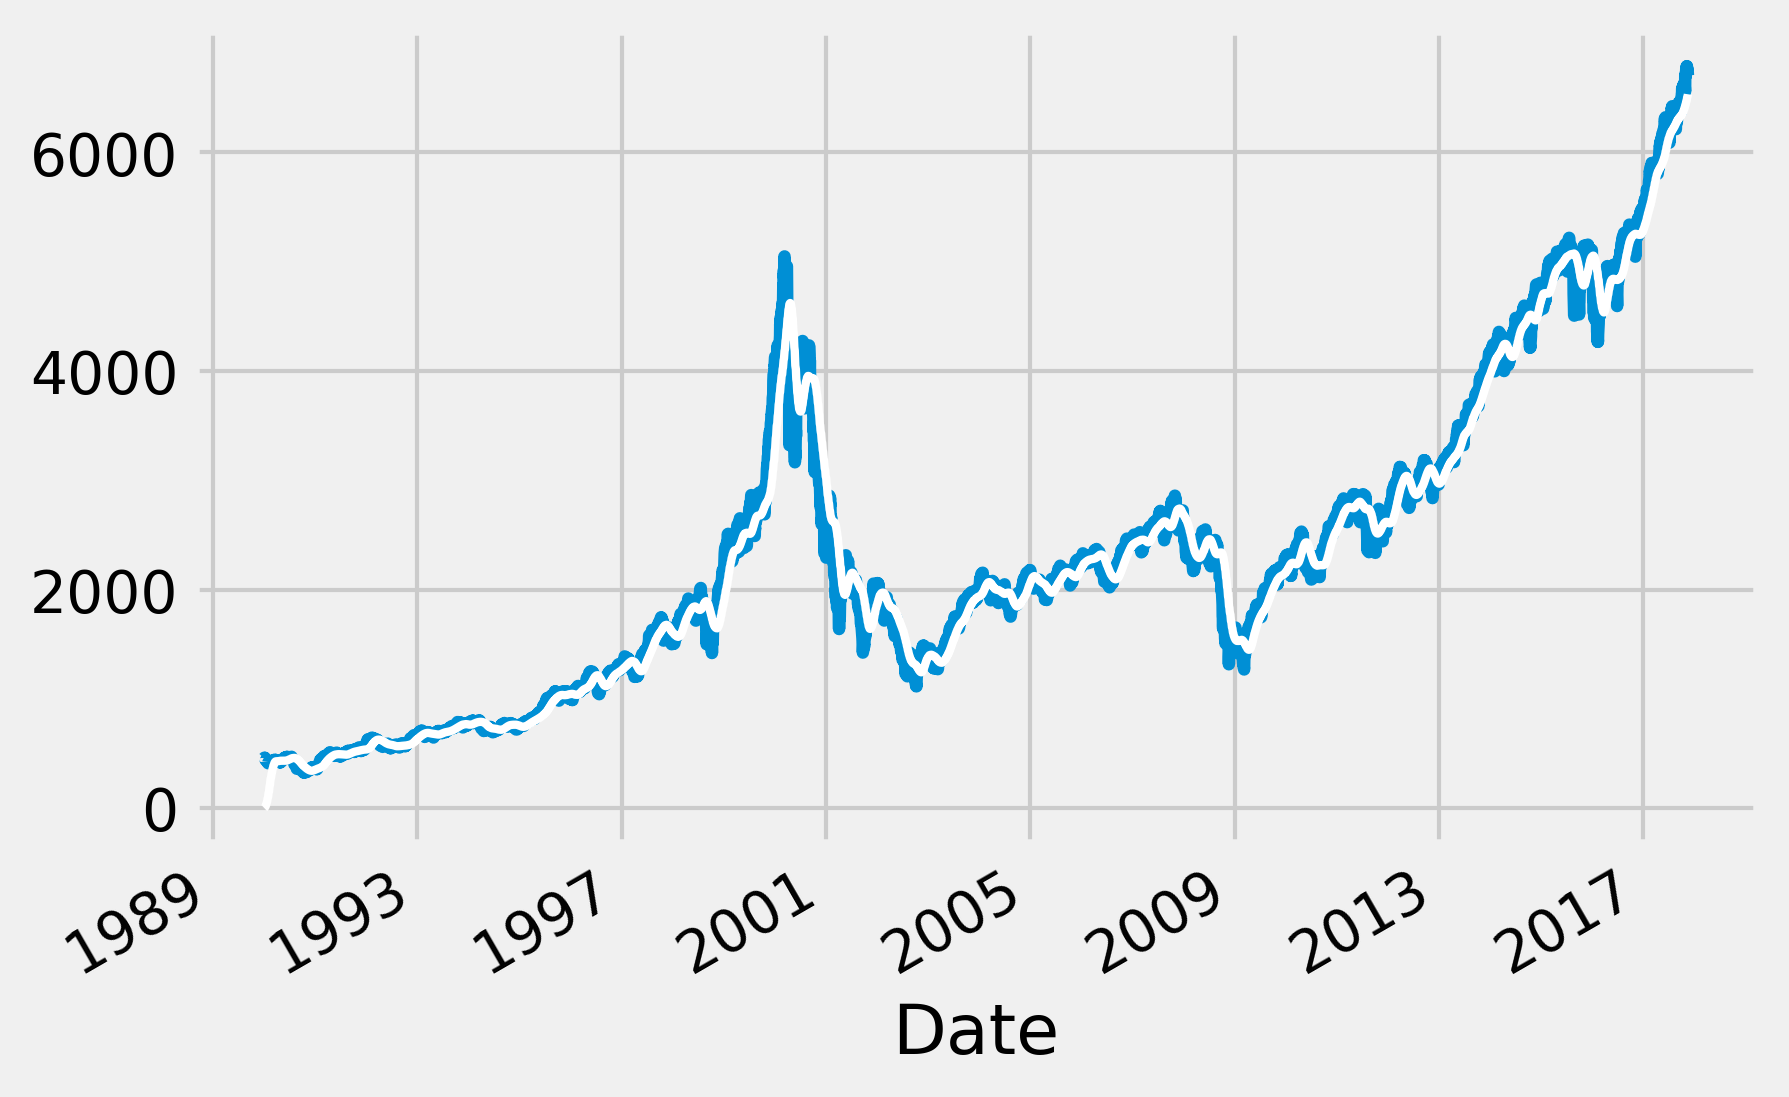

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
# We plot the original signal...
nasdaq.plot(ax=ax, lw=3)
# ... and the filtered signal.
ax.plot_date(date, fil[:len(nasdaq)],
             '-w', lw=2)

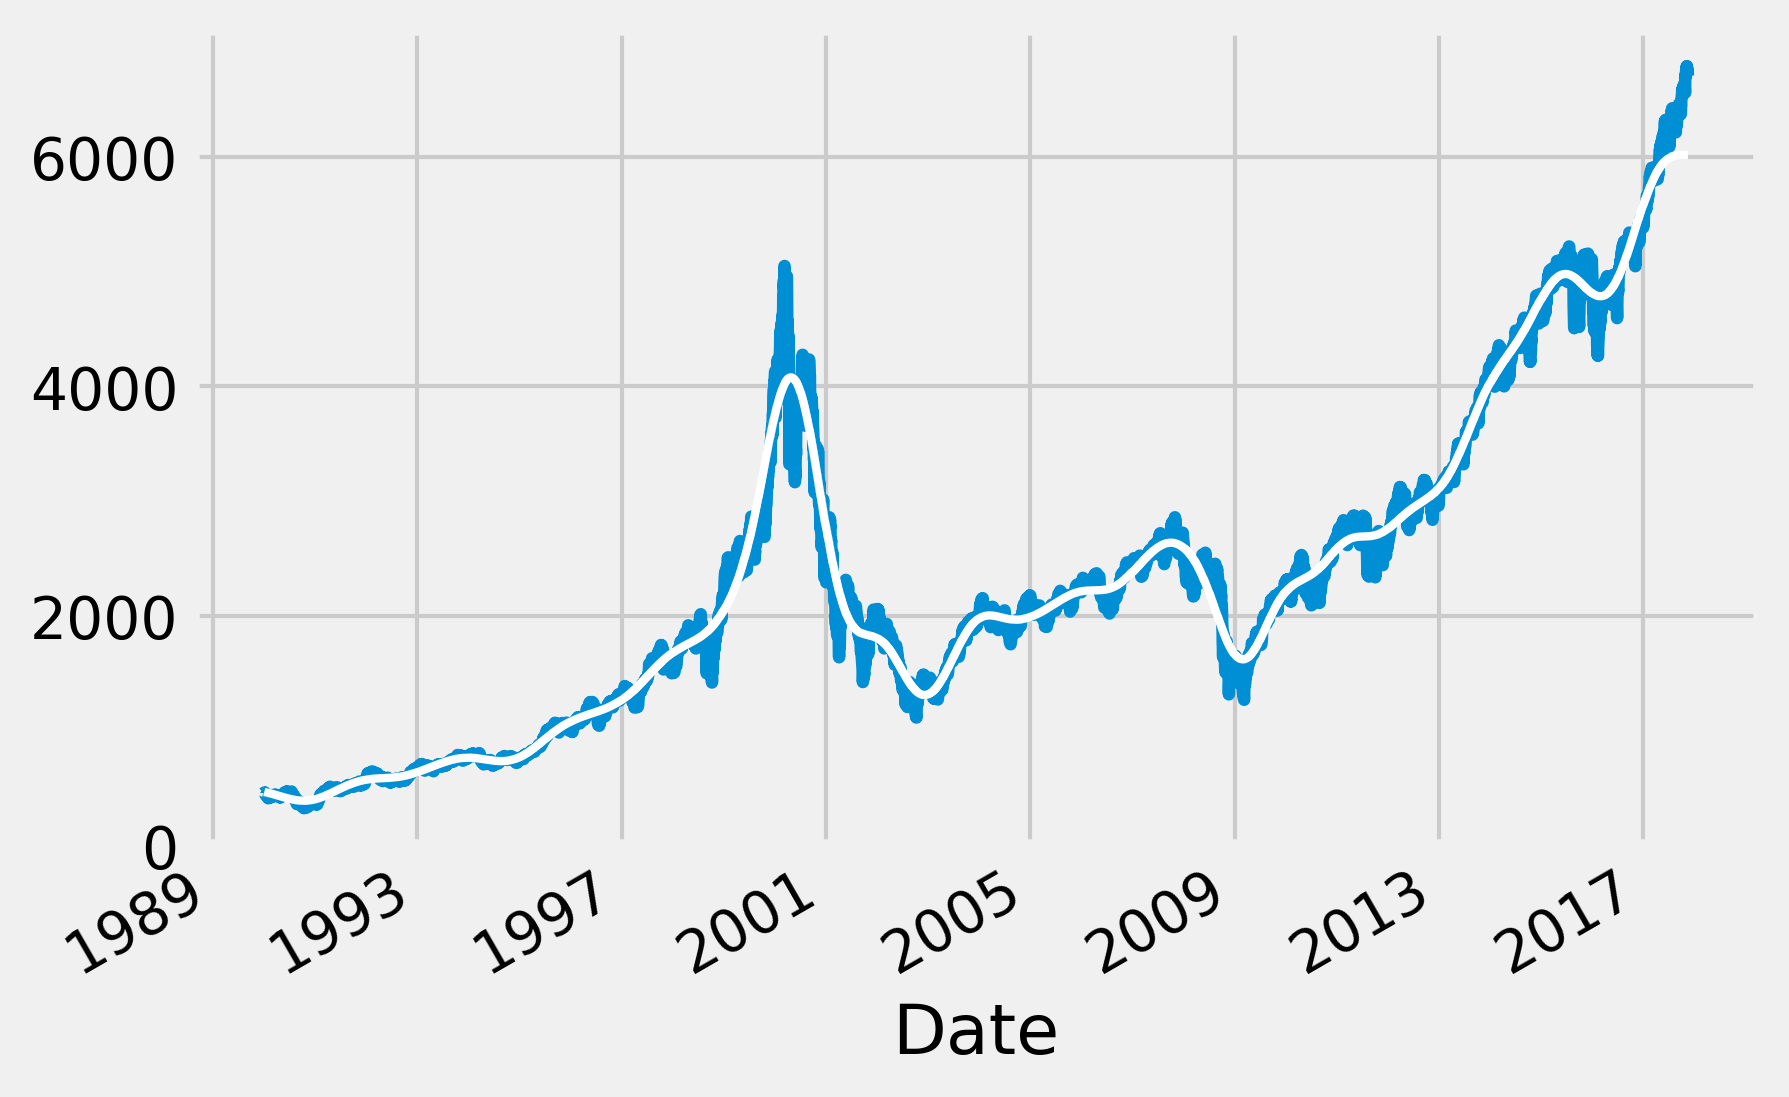

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
nasdaq.plot(ax=ax, lw=3)
# We create a 4-th order Butterworth low-pass filter.
b, a = sg.butter(4, 2. / 365)
# We apply this filter to the signal.
ax.plot_date(date, sg.filtfilt(b, a, nasdaq),
             '-w', lw=2)

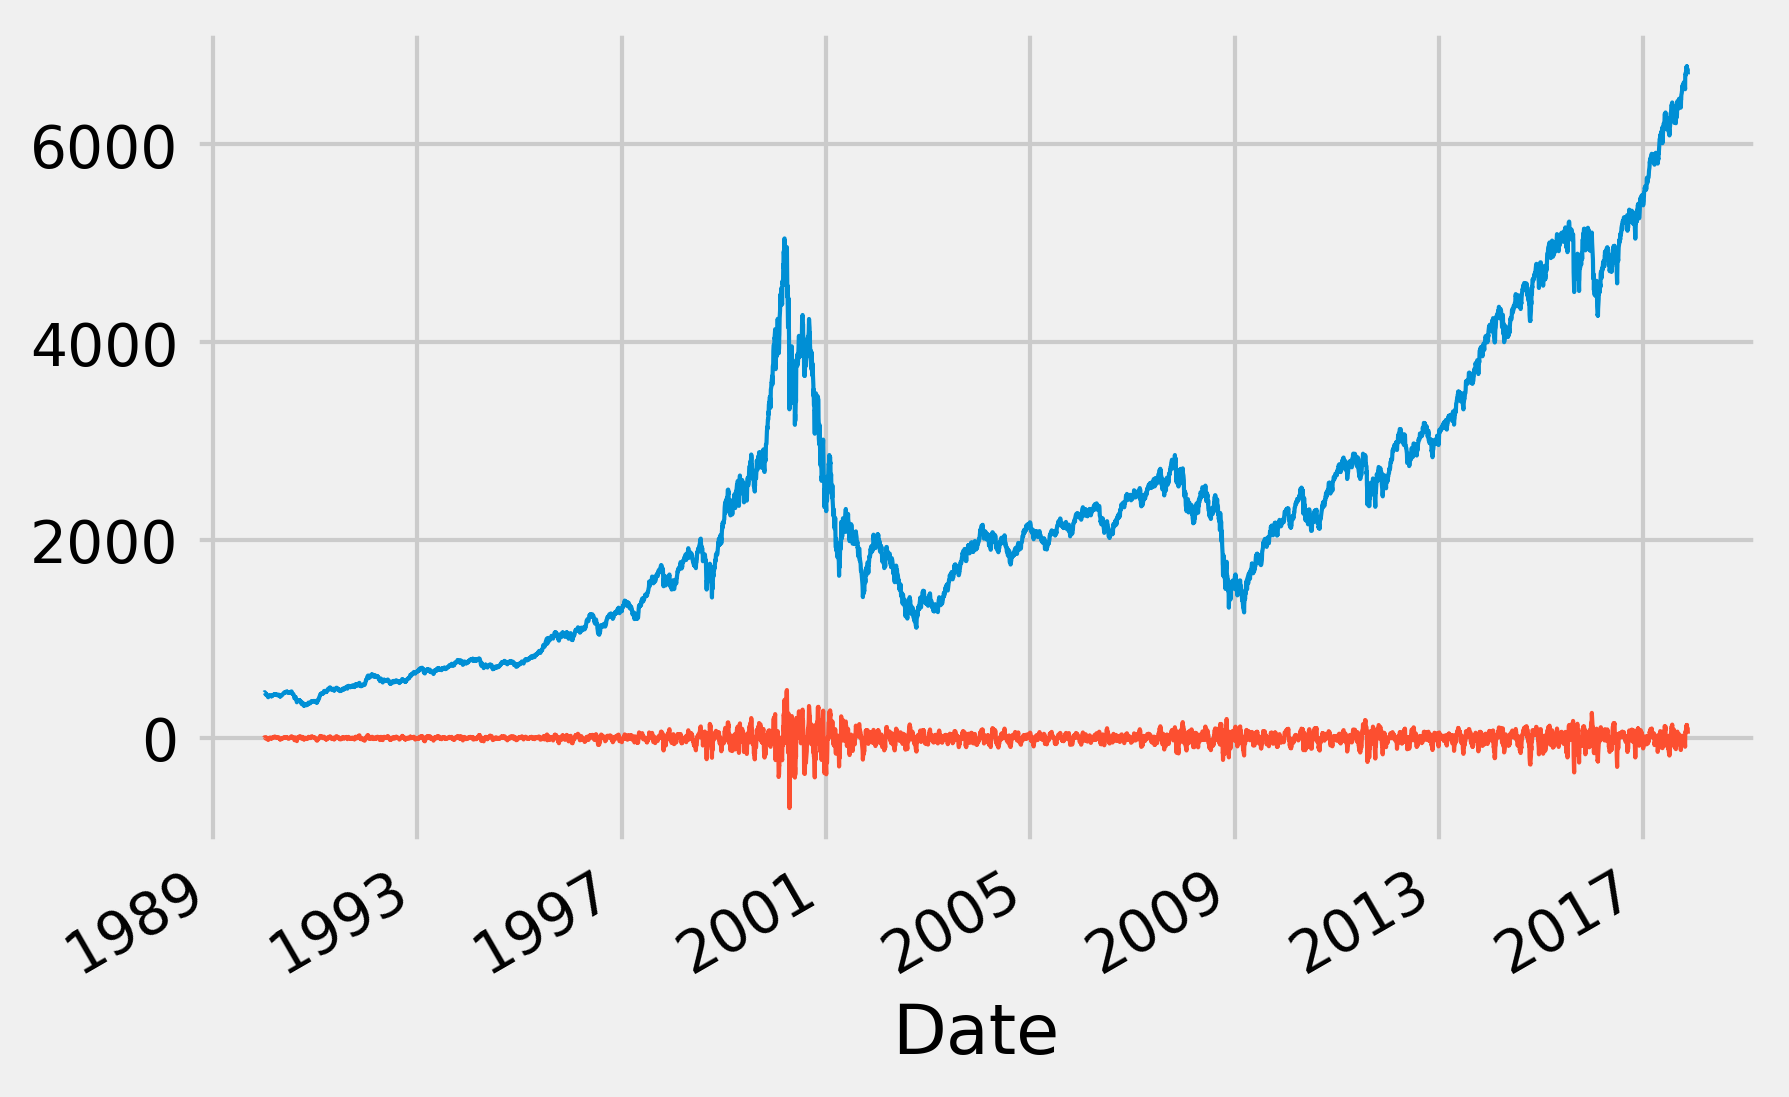

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
nasdaq.plot(ax=ax, lw=1)
b, a = sg.butter(4, 2 * 5. / 365, btype='high')
ax.plot_date(date, sg.filtfilt(b, a, nasdaq),
             '-', lw=1)